**Download** (right-click, save target as ...) this page as a Jupyterlab notebook from: [EX-1](http://54.243.252.9/ce-4353-webroot/5-Exams/EX1/EX1.ipynb)

___

# <font color=darkblue>CE 4353/5360 Design of Hydraulic Systems <br> Fall 2022 Exam 1</font>

**LAST NAME, FIRST NAME**

**R00000000**

___

### Purpose : 
Demonstrate ability to apply oen channel hydraulic design principles to ....

### Additional Instructions

The test is intended to be completed by downloading the JupyterLab Notebook, then inserting answers/code directly into the notebook - rendering the entire notebook and uploading a PDF copy (and the .ipynb file) to Blackboard.  Students who are unable to complete the test in this fashion will have to manually extract the problem statements and insert worked answers, including computations into a document for uploading.


___

### Problem 1

Prepare short answer (written) responses to the list of questions below.

> Students enrolled in 4353 choose 5 of the 7 questions.  Students enrolled in 5360 answer all of the questions.  Use complete English sentences as appropriate.  Clearly identify the questions you omit. 

1.1  Distinguish between supercritical and subcritical flow.
> Subcritical, flow depth above critical depth, velocities lower. Fr < 1; supercritical, flow depth below critical depth, velocities high, Fr > 1

1.2 Distinguish between alternate depths and sequent depths.
> Alternate and sequent are the approach and departure depths in a hydraulic jump

1.3 Explain the choking condition that can happen when we reduce the width of a rectangular open channel as we go downstream.  
> The choking condition that takes place when the width is gradually reduced is when there is not 
enough energy for the flow to continue at its previous velocity, backing up flow and increasing 
its depth.

1.4 Explain the concept of a hydraulic jump, and describe at least one flow situation that can cause a hydraulic jump.
> A hydraulic jump is an abrupt change in depth and has significant energy loss as the flow 
changes from supercritical to subcritical flow. For example, on a weir, a hydraulic jump takes 
place at the toe of the spillway.

1.5 Explain the purpose of a stilling basin as presented in this course.
> The purpose of a stilling basin is to hold and stabilize a hydraulic jump. This basin results in lower flow velocities and subcritical flow that is to be released downstream, preventing erosion as 
supercritical flow results in the greatest eroding capabilities.

1.6 Explain the flow conditions we are trying to control in the proper design of a supercritical contraction.
> Supercritical contractions are designed to control standing wave fronts. This is when two waves 
are moving in opposite directions with the same frequency and interference takes place. The 
goal is to minimize the transmission of standing waves downstream by the inclusion of the 
correct wall angle.

1.7 Explain why the hydraulic depth is an important quantity for use in open channel flow analyses.
> Hydraulic depth is important because it allows for calculation of the Froude number, which 
characterizes the flow type as either subcritical or supercritical. Without hydraulic depth, there 
would be no analysis for non-rectangular, geometric properties.

---

### Problem 2
Water flows at 600 cfs and 4.0 ft of depth through a 20-ft wide rectangular open channel.  
A rise in the channel bottom elevation is being considered for the downstream portion of the channel.   
($g = 32.2 \frac{ft}{sec^2}$, $\gamma_{water} = 62.4~\frac{lbf}{ft^3}$,$\rho_{water} = 1.94~\frac{slugs}{ft^3}$)

Determine: 
- The maximum allowable rise in the channel bottom in ft that will just prevent choking.

# sketch(s) here
![](pr2draw.png)

# list known quantities
- g = 32.2 
- Q = 600 CFS
- y1= 4 ft
- B1=20 ft

- B2=20 ft

# list unknown quantities
- dz = 0.321

# governing principles
Easiest but non-elegant way is

1. Compute E before and on the step.
2. Adjust flow depth on step so E2+step = E1
3. For choking, set flow on step to criticail

In [18]:
# solution (step-by-step/computations)
def spNRG(y,width,discharge,gravity): #specific energy in a rectangular channel
    numerator=discharge**2
    denominator=(2.0*gravity)*(width**2)*(y**2)
    if denominator == 0.0: #probably depth is zero
        raise Exception("divide by zero, check your inputs dumbass!")
    spNRG=numerator/denominator + y
    return(spNRG)

def Fr2(y,width,discharge,gravity):
    Fr2=(width*discharge**2)/(gravity*(width*y)**3)
    return(Fr2)

g = 32.2 #given
Q =600 #given
y1= 4 #given
B1=20 #given
dz=0.321#find
B2=20 # given
y2 = ((Q**2)/(g*B2*B2))**(1/3) # force yc on step
NRG1=spNRG(y1,B1,Q,g)
NRG2=spNRG(y2,B2,Q,g)
FR1=Fr2(y1,B1,Q,g)**(1/2)
FR2=Fr2(y2,B2,Q,g)**(1/2)

print("Small Step in Horizontal Channel")
print("Section 1: "+"Sp. energy ",NRG1," depth ",y1," step height ",0,"Fr ",FR1)
print("Section 2: "+"Sp. energy ",NRG2+dz," depth ",y2," step height ",dz,"Fr ",FR2)

Small Step in Horizontal Channel
Section 1: Sp. energy  4.873447204968944  depth  4  step height  0 Fr  0.6608506657971013
Section 2: Sp. energy  4.873187462239683  depth  3.034791641493122  step height  0.321 Fr  1.0


In [58]:
# check with 
# Find y2 given y1, B, Q, deltaz
deltaz = 0.3201 #m zero means no step
B = 20.0  #m
y1 = 4 #m
Q = 600  #m^3/s
g = 32.2 #m/s^2
y2 = 3.982 #m initial guess

def spNRG(y,width,discharge,gravity): #specific energy in a rectangular channel
    numerator=discharge**2
    denominator=(2.0*gravity)*(width**2)*(y**2)
    if denominator == 0.0: #probably depth is zero
        raise Exception("divide by zero, check your inputs dumbass!")
    spNRG=numerator/denominator + y
    return(spNRG)

def func(y1,y2,width,discharge,gravity,deltaz): #our function to find zeros
    func = spNRG(y2,width,discharge,gravity) + deltaz - spNRG(y1,width,discharge,gravity)
    return(func)
# Set-up a bisection-type solver
howmany = 25 # number of iterations
clow = 3.0 # lower limit for y2
chigh = 5.0 # upper limit for y2
dtrue = 0.0000001 # ground truth value
tol = 1e-5 # desired accuracy

import numpy # useful library with absolute value and sign functions

############ Learning Phase ################
# check if clow and chigh bound a solution
if numpy.sign(func(y1,clow,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,chigh,B,Q,g,deltaz)-dtrue):
    print(func(y1,clow,B,Q,g,deltaz)-dtrue)
    print(func(y1,chigh,B,Q,g,deltaz)-dtrue)
    raise Exception("The scalars clow and chigh do not bound a solution")

for iteration in range(howmany):  

# get midpoint
    m = (clow + chigh)/2

    if numpy.abs(func(y1,m,B,Q,g,deltaz)-dtrue) < tol:
        # stopping condition, report m as root
        print('y2 = ',round(m,3),"f(y2)=",round(func(y1,m,B,Q,g,deltaz),3))
        break
    elif numpy.sign(func(y1,clow,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,m,B,Q,g,deltaz)-dtrue):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        clow = m # update clow with m
    elif numpy.sign(func(y1,chigh,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,m,B,Q,g,deltaz)-dtrue):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        chigh = m # update chigh with m
####################################################

y2 =  3.084 f(y2)= -0.0


# discussion
Maximum step is 0.321 feet (not very much)

---

### Problem 3
A contracted sharp-crested weir has been placed across a stream that has a total channel width of 4.0 m.  
The weir crest length is 2.7 m, and the weir crest height is 1.0 m above the channel bottom.  
Under a certain flow condition, the head of water above the weir crest is 0.25 m.  
The correction for the head on the weir is $k_H = 0.001 m$.    
($g = 9.81 \frac{m}{sec^2}$, $\gamma_{water} = 9810~\frac{N}{m^3}$,$\rho_{water} = 1000~\frac{kg}{m^3}$)

Determine

- The flow rate through the weir in $\frac{m^3}{sec}$, considering the appropriate correction factors and discharge coefficient.

# sketch(s) here
![](pr3draw.png)

# list known quantities
- L = 2.7 # crest width
- H = [0.25] # approach head
- B = 4 # ft given
- k_l = 0.002 #chart 2.23(c) pg 44
- k_h = 0.001 #ft pg 44 given
- P = 1.0 #ft minimum value suggested p45
- g= 9.81

# list unknown quantities
- Q = [0 for i in range(len(H))]

# governing principles
1. Weir equation, using Kindsvater-Carter formula 

# solution (step-by-step) 

In [105]:
# Rectangular weir formula
def Qrect(C_de,L_e,H_e,g):
    import math
    Qrect=(2/3)*math.sqrt(2.0*g)*C_de*L_e*(H_e**(3/2))
    return(Qrect)

In [106]:
# Kindsvater-Carter formula interpolation

def lagint(xlist,ylist,xpred):
    # lagrangian interpolation of order len(xlist)-1 
    # 
    lagint = 0.0 # ypred is an accumulator, and will be output
    norder = len(xlist)
    for i in range(norder):
        term = ylist[i] # build up terms of polynomial
        for j in range(norder):
            if (i != j):
                term = term * (xpred-xlist[j])/(xlist[i]-xlist[j])
#            pass # may not need this expression
        lagint = lagint + term
#    print(i,j) #debugging expression
    return(lagint)

L_over_b = [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0]
beta1 = [0.602,0.599,0.597,0.595,0.593,0.592,0.591,0.59,0.589,0.588,0.587]
beta2 = [0.075,0.064,0.045,0.03,0.018,0.011,0.0058,0.002,-0.0018,-0.0021,-0.0023]

In [109]:
# build a table to find discharge
L = 2.7 # feet crest width
H = [0.25] # approach head
B = 4 # ft given
k_l = 0.002 #chart 2.23(c) pg 44
k_h = 0.001 #ft pg 44
P = 1.0 #ft minimum value suggested p45
Q = [0 for i in range(len(H))]
g=9.81

for i in range(len(H)):
    He = H[i]+k_h
    Le = L + k_l
    Cd = lagint(L_over_b,beta1,L/B)+ (He/P)*lagint(L_over_b,beta2,L/B)
    Q[i] = Qrect(Cd,Le,He,g)
    print("Approach head ",round(H[i],3)," feet Weir Discharge ",round(Q[i],3)," CMS","C_d ",round(Cd,3))

Approach head  0.25  feet Weir Discharge  0.603  CMS C_d  0.601


# discussion
A subtle change in solution for ES3 solves this case.  Q=0.606 cms

---

### Problem 4

A stilling basin is being designed to manage a hydraulic jump downstream of an emergency spillway.  
The stilling basin is a rectangular channel with width of 20 ft.  
At a flow rate of 1000 cfs, the incoming upstream depth is 2.5 ft.  
($g = 32.2 \frac{ft}{sec^2}$, $\gamma_{water} = 62.4~\frac{lbf}{ft^3}$,$\rho_{water} = 1.94~\frac{slugs}{ft^3}$)

Determine

- The sequent downstream depth in ft.
- The head loss across the jump in ft.
- The drag coefficient, $C_d$ for a set of 12 baffle blocks that are capable of holding the downstream depth to 5.0 ft.   Each block is 2.0 ft tall and 2.0 ft wide (as facing upstream.)

# sketch(s) here
Ordinary rectangular channel

![](pr4draw1.png)

Baffle blocks in stilling basin

![](pr4draw2.png)

# list known quantities

- y1 = 2.5 # given
- B1 = 20 #given
- Q = 1000 #given
- g = 32.2 #given


# list unknown quantities
- y2
- $\Delta$ EGL
- $C_d$

# governing principles
1. Depth ratio rectangular channel: $$\frac{y_2}{y_1} = \frac{1}{2} [\sqrt{1 + 8 Fr_1^2} - 1]$$
2. Head loss: $$h_L = E_1 - E_2 = (y_1+\frac{V_1^2}{2g})-(y_2+\frac{V_2^2}{2g})$$
3. Baffle blocks behavior:
- Compute drag force from momentum functions
- Find Cd from definition of form drag

# solution (step-by-step) 

In [112]:
# prototype functions
import math

def spNRG(y,width,discharge,gravity): #specific energy in a rectangular channel
    numerator=discharge**2
    denominator=(2.0*gravity)*(width**2)*(y**2)
    if denominator == 0.0: #probably depth is zero
        raise Exception("divide by zero, check your inputs dumbass!")
    spNRG=numerator/denominator + y
    return(spNRG)

def Fr2(y,width,discharge,gravity):
    Fr2=(width*discharge**2)/(gravity*(width*y)**3)
    return(Fr2)

y1 = 2.5 # given
B1 = 20 #given
Q = 1000 #given
g = 32.2 #given

FR1 = math.sqrt(Fr2(y1,B1,Q,g))

y2 = (y1/2.0)*(math.sqrt(1+8*FR1**2)-1)

print("Approach depth ",round(y1,3),"meters\nDeparture depth ",round(y2,3),"meters")

Approach depth  2.5 meters
Departure depth  6.73 meters


In [113]:
# Now head losses
NRG1=spNRG(y1,B1,Q,g)
NRG2=spNRG(y2,B1,Q,g)
deltah = NRG1-NRG2
print("Head loss in jump ",round(deltah,3),"meters")

Head loss in jump  1.124 meters


In [114]:
# Baffle blocks analysis
# M1 = M2 + Drag/sp.weight
def MFN(y,width,discharge,gravity):
    MFN=(width*y**2)/2.0+(discharge**2)/(gravity*width*y)
    return(MFN)
y1 = 2.5
y2 = 5.0
m1 = MFN(y1,B1,Q,g)
m2 = MFN(y2,B1,Q,g)
gamma = 62.4

drag = (m1-m2)*gamma

print("Drag force required ",round(drag,3))


Drag force required  7678.882


In [115]:
# Cd needed
# Cd = 2Drag/rho A V^2
blockW = 2.0 # given
blockH = 2.0 # given
blockA = blockH*blockW
howmanyblocks = 12
Ap = blockA*howmanyblocks
Va = Q/(y1*B1)
Cd = 2*drag/((gamma/g)*Ap*Va**2)
print("Cd ",round(Cd,3))

Cd  0.413


# discussion
The $C_d$ value is the required value to balance momentum, but seems a bit small, should check Reynolds number and look up in literature

---

### Problem 5 

A trapezoidal channel carries a flow rate of 30 $\frac{m^3}{sec}$ at a depth of 2.5 m.  
The channel bottom width is 25 m, and the side wall slopes are 2 horizontal to 1 vertical.    

Determine 

- The velocity in $\frac{m}{sec}$.  
- If the flow supercritical or subcritical

# sketch(s) here
![](pr5draw.png)

In [ ]:
# list known quantities

In [ ]:
# list unknown quantities

In [ ]:
# governing principles

In [ ]:
# solution (step-by-step) 

In [103]:
# prototype functions

def Atrap(depth,width,sideslope):
    Atrap = width*depth+sideslope*depth**2
    return(Atrap)

def Ttrap(depth,width,sideslope):
    Ttrap = width + 2*depth*sideslope
    return(Ttrap)

def Ptrap(depth,width,sideslope):
    Ptrap = width + 2*depth* ((sideslope**2 + 1)**(1/2))
    return(Ptrap)

def Rhyd(area,perimeter):
    Rhyd=area/perimeter
    return(Rhyd)

def Fr(depth,velocity,gravity):
    import math
    Fr = velocity/(math.sqrt(gravity*depth))
    return(Fr)



In [104]:
Q = 30 #given
g = 9.8 #given
y = 2.5 #given
m = 2 #given
B = 25 #given
A = Atrap(y,B,m)
V = Q/A
print("Mean Section Velocity ",round(V,3)," m/s")
dhyd = A/Ttrap(y,B,m)
FrT = Fr(y,V,g)
print("Froude Number ",round(FrT,3),"")

Mean Section Velocity  0.4  m/s
Froude Number  0.081 


# discussion
Fr <1; thus subcritical

---

### Problem 6 

**Students enrolled in CE 4353 omit this problem.  CE 5360 complete this problem**

A 1.0-m diameter pipe carries a partially full flow of water.  The maximum depth of water (as measured from the pipe invert - thelowest point in the cross-section) is 0.40 m.  
The flow rate is 1.5 $\frac{m^3}{sec}$.  

Determine 

- The velocity in $\frac{m}{sec}$.  
- If the flow supercritical or subcritical

# sketch(s) here
![](pr6draw.png)

# list known quantities
- D = 1.0 #given
- y = 0.40 #given
- Q = 1.5 #given
- g = 9.8 #given

# list unknown quantities
- $\bar V$
- $D=\frac{A}{T}$
- $Fr$

# governing principles
- Compute area
- Compute topwidth
- V = Q/A
- D = A/T
- $Fr = \frac{V}{\sqrt{gD}}$

# solution (step-by-step) 

In [117]:
# prototype functions

def area(theta,diameter):
    import math
    area=(1/8)*(theta-math.sin(theta))*diameter**2
    return(area)

def topw(theta,diameter):
    import math
    topw=diameter*math.sin(theta/2)
    return(topw)

def perimeter(theta,diameter):
    perimeter = diameter*theta/2
    return(perimeter)

def angle(depth,diameter):
    import math
    angle=2*math.acos(1-2*depth/diameter)
    return(angle)

In [118]:
D = 1.0 #given
y = 0.40 #given
Q = 1.5 #given
g = 9.8 #given

alpha=angle(y,D)
A = area(alpha,D)

V = Q/A
dhyd = A/topw(alpha,D)
FRC = Fr(dhyd,V,g)

print("Mean Section Velocity ",round(V,3),"m/s")
print("Froude Number ",round(FRC,3),"")

Mean Section Velocity  5.113 m/s
Froude Number  2.985 


# discussion
Fr >1 supercritical

---

### Problem 7 

**Students enrolled in CE 4353 omit this problem.  CE 5360 complete this problem**

A parabolic channel with maximum topwidth of 60 feet is constructed on a longitudinal slope of 0.005.  The maximum depth is 8 feet.  The channel is cement stabilized with a Manning's n of 0.013.  What is the discharge in the channel when it is full, and when it is half full.  Make a plot of the parabolic channel cross section, and indicate the two water surfaces on the plot.

![](pr7draw.png)

## From parabolic definitions

$$T = 2\frac{\sqrt{y}}{\sqrt{k}} $$

$$A = 4y \frac{\sqrt{\frac{y}{k}}}{3} $$

$$\sqrt{k} = \frac{2 \sqrt{y_{max}}}{T_{max}}$$



In [139]:
# prototype functions
def Qman(K,n,area,radius,slope):
    Qman=(K/n)*(area)*(radius**(2/3))*(slope**(1/2))
    return(Qman)

def Apara(depth,k):
    Apara= 4*depth*((depth/k)**(1/2))/3
    return(Apara)

def Tpara(depth,k):
    Tpara=2*((depth/k)**(1/2))
    
def Ppara(depth,B):
    Ppara = B+(8/3)*((depth**2)/B)
    return(Ppara)
    
Tmax=64 # given
ymax=8  # given
k = 2*(ymax**(1/2))/Tmax
k=k**2
n =0.013 #given
slope = 0.005 #given


# Full
Afull = Apara(ymax,k)
Pfull = Ppara(ymax,Tmax)
Rfull = Afull/Pfull
Qfull = Qman(1.49,n,Afull,Rfull,slope)
# 1/2full
Ahalf = Apara(ymax/2,k)
Phalf = Ppara(ymax/2,Tmax)
Rhalf = Ahalf/Phalf
Qhalf = Qman(1.49,n,Ahalf,Rhalf,slope)

print("Qfull ",round(Qfull,3)," cfs\nQhalf ",round(Qhalf,3)," cfs")


Qfull  8217.756  cfs
Qhalf  1482.508  cfs


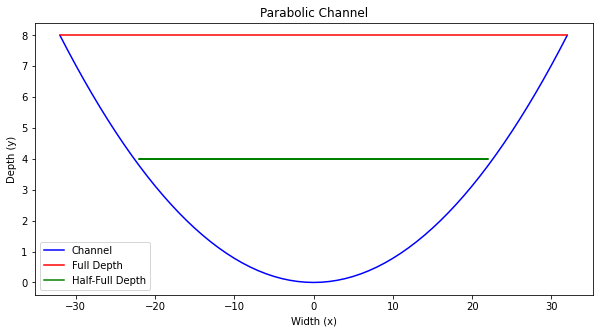

In [140]:
x = [0 for i in range(65)]
y = [0 for i in range(65)]
xf = [0 for i in range(65)]
xh = [0 for i in range(65)]
yf = [ymax for i in range(65)]
yh = [ymax/2 for i in range(65)]

for i in range(65):
    x[i]=float(i)-32.0
    y[i]=k*x[i]**2
    xf[i]=x[i]
    if y[i] < ymax:
        xf[i]=x[i]
    if y[i] < ymax/2.:
        xh[i]=x[i]
    

import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio
# Built the plot
matplotlib.pyplot.plot(x, y, color ='blue') 
matplotlib.pyplot.plot(xf, yf, color ='red') 
matplotlib.pyplot.plot(xh, yh, color ='green') 
matplotlib.pyplot.xlabel("Width (x)") 
matplotlib.pyplot.ylabel("Depth (y)") 
matplotlib.pyplot.title("Parabolic Channel")
matplotlib.pyplot.legend(["Channel","Full Depth","Half-Full Depth"])
matplotlib.pyplot.show() 